<a href="https://colab.research.google.com/github/bhagirathbhard/Netflix-Content-Analysis/blob/nightly/A7_Netflix_Content_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<a id="Content" style="color:#023e8a;">Table of Content</a>**

* [**<span style="color:#023e8a;">1. Project Overview</span>**](#Project-Overview) 
* [**<span style="color:#023e8a;">2. Data Sources</span>**](#Data-Sources)
* [**<span style="color:#023e8a;">3. Data Import and EDA</span>**](#EDA)
* [**<span style="color:#023e8a;">4. Data Cleanup</span>**](#Data-Cleanup)
* [**<span style="color:#023e8a;">5. Key Questions Answered</span>**](#Questions)
* [**<span style="color:#023e8a;">6. Conclusion</span>**](#Conclusion)
* [**<span style="color:#023e8a;">7. References</span>**](#References)

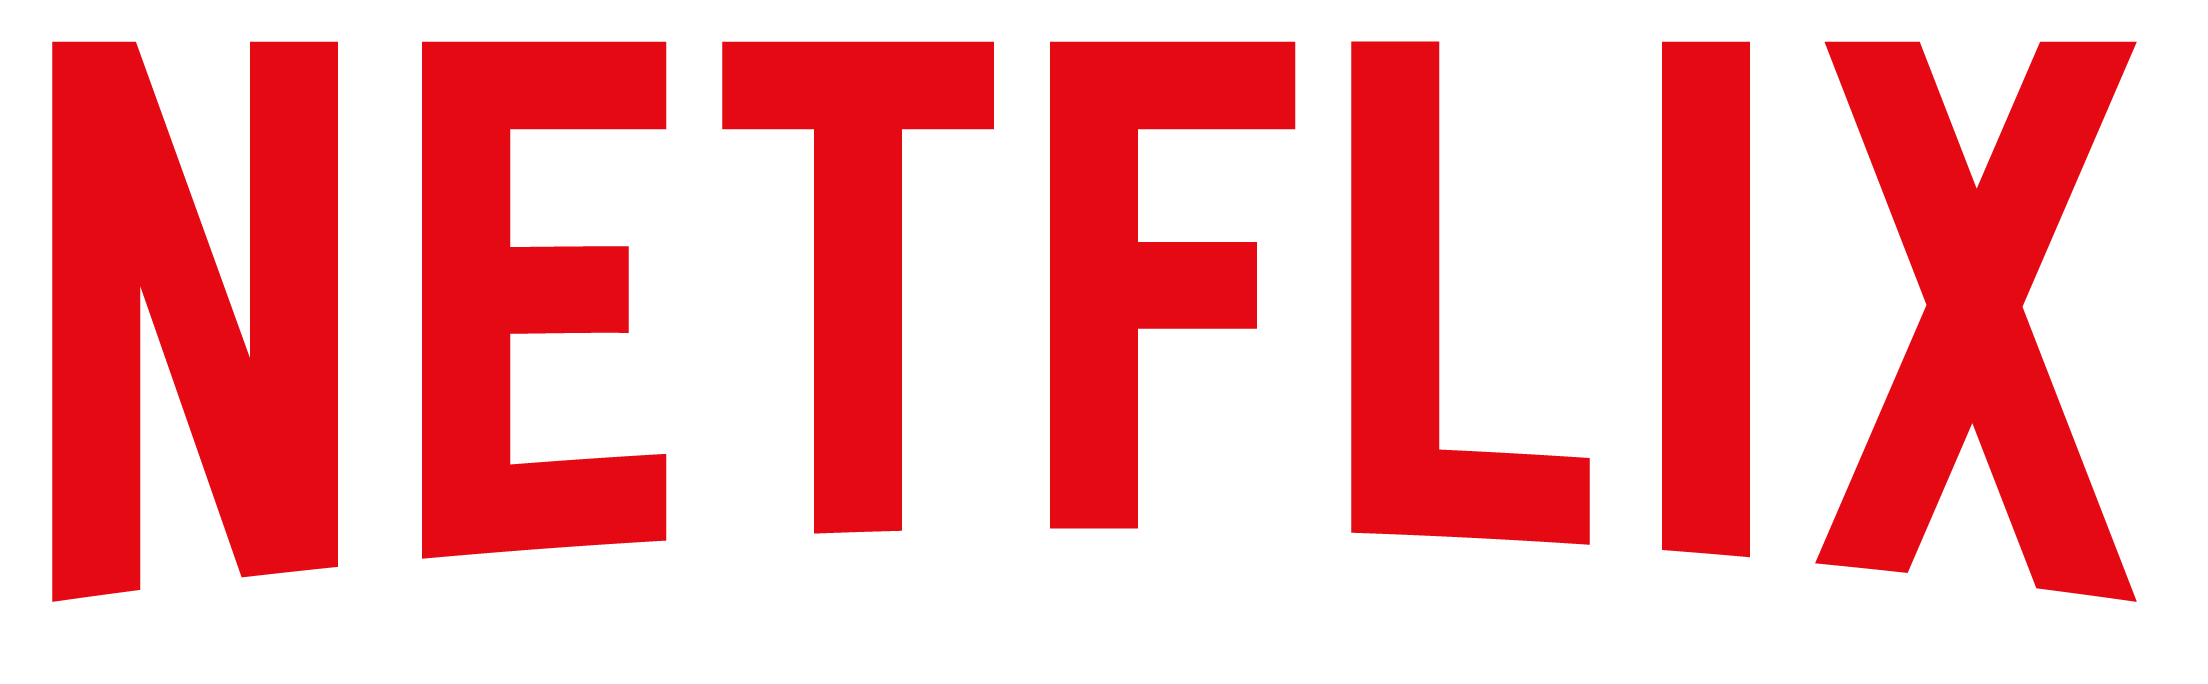

# **<span style="color:#023e8a;font-size:200%"><center>Analysis of Netflix Content Library</center></span>**

## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Bhagirath Bhardwaj, Jinisha Kande, Paulin Jesintha Mariadoss, Renata Halim, Sohil Jain, and Sonal Kaur</span></center>**

# **<span id="Project-Overview" style="color:#023e8a;">Project and Dataset Overview</span>**

**Netflix Content Analysis**


Netflix’s content library and their recommendations engine play a big role in what content consumed by people worldwide. Research from Netflix shares that over 80% of the content watched on their platform came from
Their recommendations engine. As Netflix has over 100 million users worldwide, it becomes crucial for Netflix to implement a strong data-driven algorithm to recommend customized movies and tv shows to its audience.

The following project seeks to -

*   Perform Exploratory Data Analysis, Data cleanup on the dataset using Python.
*   Analyze variables in our dataset such as actors, genres, directors, ratings etc.
*  Find answers to key questions and trends around Netflix’s investment into various kinds of content media.


**Motivation:** The project is interested in studying the changes in Netflix’s content strategy over the years. We are curious to know if or to what extent these changes resulted from cultural and target audience changes in Netflix's subscriber base.

# **<span id="Data-Sources" style="color:#023e8a;">Data Sources</span>**

*   [Netflix-Shows by Shivam Bansal](https://www.kaggle.com/datasets/shivamb/netflix-shows)
*  [Clarification of Source of dataset by Author](https://twitter.com/shivamshaz/status/1452642649442172931?s=20&t=OSh8EM8VNMZhmXSi6aBgtA)
> “mix of scraping, api calls and manual validation.”

* [Scraped Data - Netflix Original Programming](https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming)

# **<span id="Data-Cleanup" style="color:#023e8a;">Data Import and EDA</span>**


In [ ]:
#Importing Libraries
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!cd gdrive/Shareddrives/BA780/.kaggle/

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "gdrive/Shareddrives/BA780/.kaggle/"

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! chmod 600 gdrive/Shareddrives/BA780/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shivamb/netflix-shows

 75% 1.00M/1.34M [00:00<00:00, 1.22MB/s]
100% 1.34M/1.34M [00:00<00:00, 1.54MB/s]


In [ ]:
!unzip netflix-shows.zip 

Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [ ]:
#netflix_ds = pd.read_csv('/Users/bhagirathbhardwaj/Library/CloudStorage/GoogleDrive-bbhardw@bu.edu/Shared drives/BA780/netflix_titles.csv')
netflix_ds = pd.read_csv('netflix_titles.csv')
netflix_ds.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Check dataset shape
netflix_ds.shape

(8807, 12)

In [ ]:
#Check Dataset info
netflix_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix_ds.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# **<span id="Data-Cleanup" style="color:#023e8a;">Data Cleanup</span>**



In [ ]:
#Check Null Values per column
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_ds.dropna(inplace=True,thresh=2) #Threshold of 2 does not end up removing anything

In [ ]:
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
netflix_ds.shape

(8807, 12)

In [ ]:
netflix_ds["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
#Rating has duration (74 mins, 84 etc. needs to be cleaned and replaced)
netflix_ds[netflix_ds["rating"].isin(["74 min","84 min","66 min"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| Louis C.K. 2017      | TV-MA       |
| Louis C.K.: Hilarious   | TV-MA        |
| Louis C.K.: Live at the Comedy Store | TV-MA |

In [ ]:
#Replacing the ratings from NaN
netflix_ds["rating"].replace(["74 min","84 min","66 min"], "TV-MA", inplace= True)

In [ ]:
netflix_ds[netflix_ds["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


**External Manual Validation of Ratings**

| Title       | Rating as per IMDB |
| ----------- | ----------- |
| 13TH: A Conversation with Oprah Winfrey & Ava DuVernay| TV-PG |
| Gargantia on the Verdurous Planet      | TV-14       |
| Little Lunch	   | TV-MA        |
| My Honor Was Loyalty	 | PG-13 |

In [ ]:
netflix_ds['rating'][netflix_ds['title'] =='13TH: A Conversation with Oprah Winfrey & Ava DuVernay'] = 'TV-PG'
netflix_ds['rating'][netflix_ds['title']=='Gargantia on the Verdurous Planet'] = 'TV-14'
netflix_ds['rating'][netflix_ds['title']=='Little Lunch'] = 'TV-MA'
netflix_ds['rating'][netflix_ds['title']=='My Honor Was Loyalty'] = 'PG-13'

/var/folders/v9/k69h39b53y76ch5y4yznv9b80000gn/T/ipykernel_20999/1299650104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_ds['rating'][netflix_ds['title'] =='13TH: A Conversation with Oprah Winfrey & Ava DuVernay'] = 'TV-PG'
/var/folders/v9/k69h39b53y76ch5y4yznv9b80000gn/T/ipykernel_20999/1299650104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_ds['rating'][netflix_ds['title']=='Gargantia on the Verdurous Planet'] = 'TV-14'
/var/folders/v9/k69h39b53y76ch5y4yznv9b80000gn/T/ipykernel_20999/1299650104.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
netflix_ds["rating"].value_counts(ascending=False)

TV-MA       3211
TV-14       2161
TV-PG        864
R            799
PG-13        491
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [ ]:
pd.isnull(netflix_ds).sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             0
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Replacing and filling in director, cast, and country 
netflix_ds.fillna({'director': 'Not Listed', 'country': 'Not Listed', 'cast': 'Not Listed'}, inplace=True)
pd.isnull(netflix_ds).sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [ ]:
netflix_ds.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Unique values in each column
netflix_ds.nunique().sort_values(ascending=False)

show_id         8807
title           8807
description     8775
cast            7693
director        4529
date_added      1714
country          749
listed_in        514
duration         220
release_year      74
rating            14
type               2
dtype: int64

In [ ]:
#Convert Date Added column and Release Year to datetime
netflix_ds['date_added'] = pd.to_datetime(netflix_ds['date_added'])
netflix_ds['release_year'] = pd.to_datetime(netflix_ds['release_year'], format='%Y')

In [ ]:
#Clean Show ID, Duration Conversion @Bhagirath
#Two new columns 13th and 14th

In [ ]:
#Clean Duration - Manual Validation

In [ ]:
#Move Duration of Louis CK to duration

# **<span id="Questions" style="color:#023e8a;">Key Questions Answered</span>**


## Big Picture Overview Netflix’s content strategy over the years

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Create plot that can be hovered over
import plotly.express as px
#set background color to black
px.defaults.template = "plotly_dark"

fig = px.scatter(netflix_ds, x="release_year", y="duration", color="rating", hover_name="title", size_max=60)
#Set title
fig.update_layout(title_text='Netflix Content Analysis')
fig.show()

## What are the top 20 durations of Movies/TV Shows?

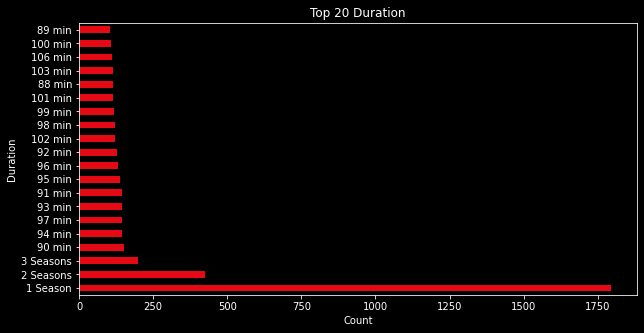

In [ ]:
import matplotlib.style as style
style.use('dark_background')  

#Plot top 20 duration column color code by rating
netflix_ds['duration'].value_counts().head(20).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Top 20 Duration')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

## Average Season Length for TV Shows

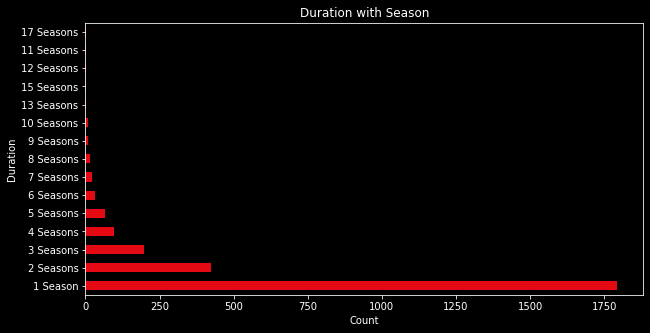

In [ ]:
#Remove NaN from duration
netflix_ds['duration'].replace('NaN', '0 min', inplace=True)
#Plot value from duration column that includes the word season
netflix_ds[netflix_ds['duration'].str.contains('Season',na=False)]['duration'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Duration with Season')
plt.xlabel('Count')
plt.ylabel('Duration')
plt.show()

## Growth of Drama TV Shows **produced** by Netflix

Because the original dataset does not include information of Producers, we use python libraries `beautifulsoup4` , `requests` to parse information from the Wikipedia page.

In [ ]:
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML documents

In [ ]:
# get the response in the form of html
wikiurl="https://en.wikipedia.org/wiki/List_of_ended_Netflix_original_programming"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [ ]:
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
netflix_originals_drama_table=soup.find('table',{'class':"wikitable"})

In [ ]:
netflix_originals_drama_ds=pd.read_html(str(netflix_originals_drama_table))
# convert list to dataframe
netflix_originals_drama_ds=pd.DataFrame(netflix_originals_drama_ds[0])
print(netflix_originals_drama_ds.head())

                     Title             Genre           Premiere  \
0           House of Cards   Political drama   February 1, 2013   
1            Hemlock Grove   Horror/thriller     April 19, 2013   
2  Orange Is the New Black      Comedy drama      July 11, 2013   
3               Marco Polo  Historical drama  December 12, 2014   
4                Bloodline          Thriller     March 20, 2015   

             Finale                 Seasons    Runtime   Notes  
0  November 2, 2018  6 seasons, 73 episodes  42–59 min     [1]  
1  October 23, 2015  3 seasons, 33 episodes  45–58 min  [2][a]  
2     July 26, 2019  7 seasons, 91 episodes  50–92 min     [3]  
3      July 1, 2016  2 seasons, 20 episodes  48–65 min     [4]  
4      May 26, 2017  3 seasons, 33 episodes  48–68 min     [5]  


In [ ]:
#Export to CSV
netflix_originals_drama_ds.to_csv('netflix_originals_ds_drama.csv', index=False)

In [ ]:
#Drop notes column
netflix_originals_drama_ds.drop(['Notes'], axis=1, inplace=True)

In [ ]:
#Split Seasons Column into two columns
netflix_originals_drama_ds[['Seasons_Only','Episodes']] = netflix_originals_drama_ds['Seasons'].str.split(',',expand=True)
netflix_originals_drama_ds.head()

,Title,Genre,Premiere,Finale,Seasons,Runtime,Seasons_Only,Episodes
0,House of Cards,Political drama,"February 1, 2013","November 2, 2018","6 seasons, 73 episodes",42–59 min,6 seasons,73 episodes
1,Hemlock Grove,Horror/thriller,"April 19, 2013","October 23, 2015","3 seasons, 33 episodes",45–58 min,3 seasons,33 episodes
2,Orange Is the New Black,Comedy drama,"July 11, 2013","July 26, 2019","7 seasons, 91 episodes",50–92 min,7 seasons,91 episodes
3,Marco Polo,Historical drama,"December 12, 2014","July 1, 2016","2 seasons, 20 episodes",48–65 min,2 seasons,20 episodes
4,Bloodline,Thriller,"March 20, 2015","May 26, 2017","3 seasons, 33 episodes",48–68 min,3 seasons,33 episodes


In [ ]:
#Convert Premiere column to datetime
netflix_originals_drama_ds['Premiere'] = pd.to_datetime(netflix_originals_drama_ds['Premiere'])
#Convert Finale column to datetime
netflix_originals_drama_ds['Finale'] = pd.to_datetime(netflix_originals_drama_ds['Finale'])

In [ ]:
#Dtypes of the columns
netflix_originals_drama_ds.dtypes

Title                   object
Genre                   object
Premiere        datetime64[ns]
Finale          datetime64[ns]
Seasons                 object
Runtime                 object
Seasons_Only            object
Episodes                object
dtype: object

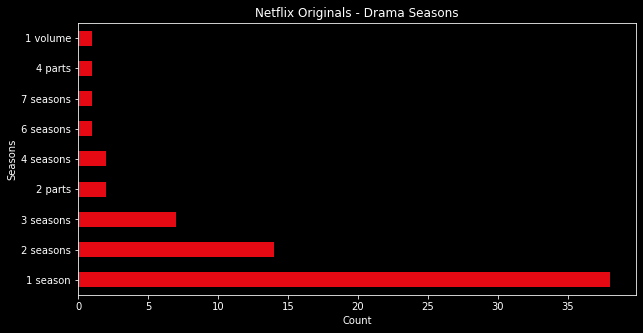

In [ ]:
#Plot Netflix Originals Drama Seasons
netflix_originals_drama_ds['Seasons_Only'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling
plt.title('Netflix Originals - Drama Seasons')
plt.xlabel('Count')
plt.ylabel('Seasons')
plt.show()

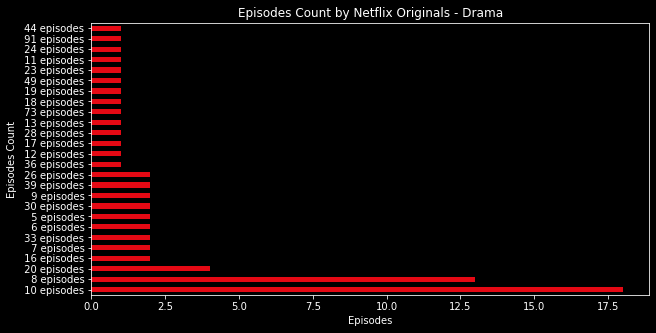

In [ ]:
#Plot Netflix Originals Drama Episodes
netflix_originals_drama_ds['Episodes'].value_counts().plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Episodes')
plt.ylabel('Episodes Count')
plt.title('Episodes Count by Netflix Originals - Drama')
plt.show()


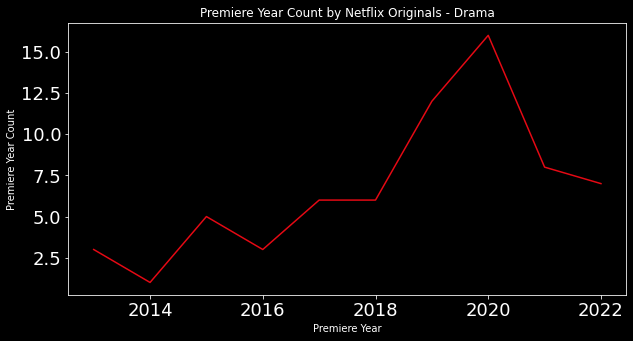

In [ ]:
#Plot time series of Premiere and Finale Year
netflix_originals_drama_ds['Premiere'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10,5), color='#E50914').tick_params(axis = 'both', which = 'major', labelsize = 18)

#Label the plot
plt.xlabel('Premiere Year')
plt.ylabel('Premiere Year Count')
plt.title('Premiere Year Count by Netflix Originals - Drama')
plt.show()

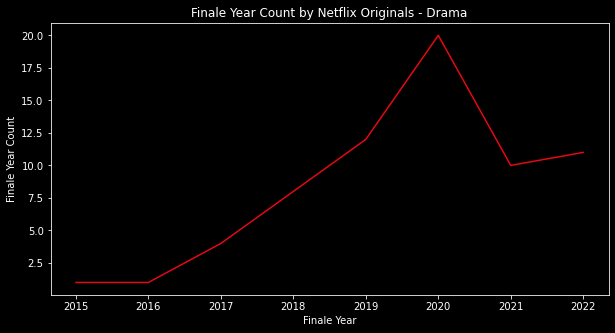

In [ ]:
#Plot finale year count by Netflix Originals Drama
plot_finale_year = netflix_originals_drama_ds['Finale'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Finale Year')
plt.ylabel('Finale Year Count')
plt.title('Finale Year Count by Netflix Originals - Drama')
plt.show()

## Number of releases per year for each genre

In [ ]:
netflix_ds2 = netflix_ds.listed_in.str.split(',').apply(pd.Series)
netflix_ds2.index = netflix_ds.set_index(["release_year"]).index
netflix_ds2 = netflix_ds2.stack().reset_index(["release_year"])
netflix_ds2.groupby(["release_year", 0])[0].count().sort_values(ascending=False)

release_year  0                    
2018-01-01     International Movies    328
2017-01-01     International Movies    316
2016-01-01     International Movies    288
2019-01-01     International Movies    258
2020-01-01     International Movies    225
                                      ... 
2015-01-01     Documentaries             1
1999-01-01     Thrillers                 1
               Teen TV Shows             1
               TV Dramas                 1
1925-01-01    TV Shows                   1
Name: 0, Length: 1569, dtype: int64

## Rating distribution for movies and TV shows per countries

In [ ]:
#Movie
#netflix_ds.groupby(["country", "rating"])["country"].count()

netflix_ds3 = netflix_ds.country.str.split(',').apply(pd.Series)
netflix_ds3.index = netflix_ds.set_index(['rating', 'type']).index
netflix_ds3 = netflix_ds3.stack().reset_index(['rating', 'type'])
netflix_ds3 = netflix_ds3.groupby([0, "type"])["rating"].count().sort_values(ascending=False)
netflix_ds3
#netflix_ds3[netflix_ds3["type"]== "Movie"]
#netflix_ds3.loc[movie]
#type(netflix_ds3)

0              type   
United States  Movie      2364
India          Movie       927
United States  TV Show     847
Not Listed     Movie       440
               TV Show     391
                          ... 
Iran           Movie         1
 Luxembourg    TV Show       1
 Malawi        Movie         1
 Malaysia      TV Show       1
Zimbabwe       Movie         1
Name: rating, Length: 291, dtype: int64

## Which director has produced the most movies?

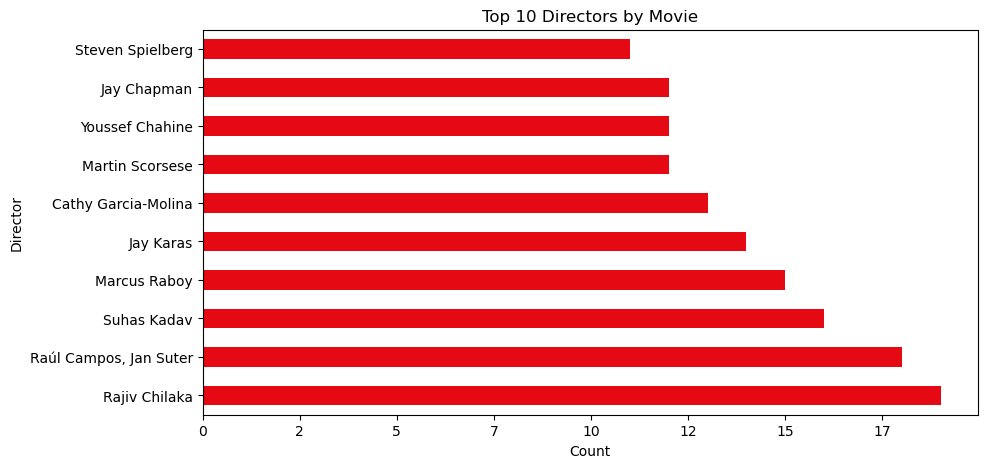

In [ ]:
#Plot top 10 directors by movie and remove Not Listed
netflix_ds[(netflix_ds['type']=='Movie') & (netflix_ds['director']!='Not Listed')]['director'].value_counts().head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Labeling the plot 
#Remove decimal from x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Top 10 Directors by Movie')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

## Proportion of Movies and TV Shows


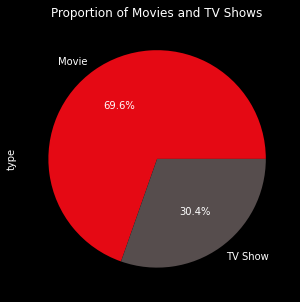

In [ ]:
#Plot proportion of movies and tv shows and color code by red and blue
netflix_ds['type'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%1.1f%%', colors=['#E50914', '#564d4d'])
#Label the plot
plt.title('Proportion of Movies and TV Shows')
plt.show()

## Content added in Netflix over the years

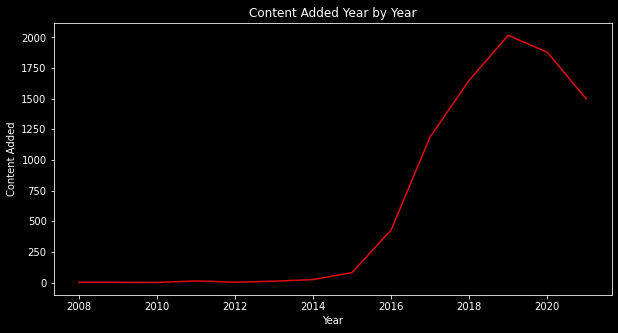

In [ ]:
#Plot content added year by year
netflix_ds['date_added'].dt.year.value_counts().sort_index().plot(kind='line', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Year')
plt.ylabel('Content Added')
plt.title('Content Added Year by Year')
plt.show()

# Which days of the week is content added to Netflix the most?


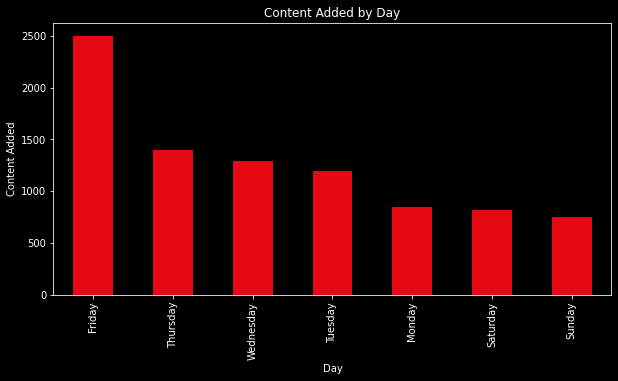

In [ ]:
#Plot which days of the week content is added to Netflix the most in descending order
netflix_ds['date_added'].dt.day_name().value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Day')
plt.ylabel('Content Added')
plt.title('Content Added by Day')
plt.show()

# Which country's content is added to Netflix the most?

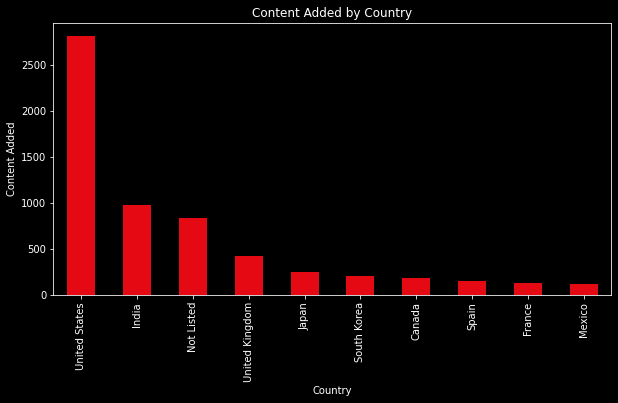

In [ ]:
#Plot country that has most shows and movies on Netflix after the US
netflix_ds['country'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

## Which country's TV Shows are the most popular on Netflix after the US?

In [ ]:
country_content = netflix_ds[(netflix_ds["type"] == "TV Show") & (netflix_ds["type"] != "Not Listed") & (netflix_ds["country"] != "Not Listed") & (netflix_ds["country"] != "United States")]
countrywise = country_content.groupby("country",as_index= False)["type"].count()
A = countrywise.sort_values("type",ascending = False).head(10)
print(A.head(10))

            country  type
140  United Kingdom   213
83            Japan   169
120     South Korea   158
66            India    79
132          Taiwan    68
17           Canada    59
47           France    49
4         Australia    48
125           Spain    48
94           Mexico    40


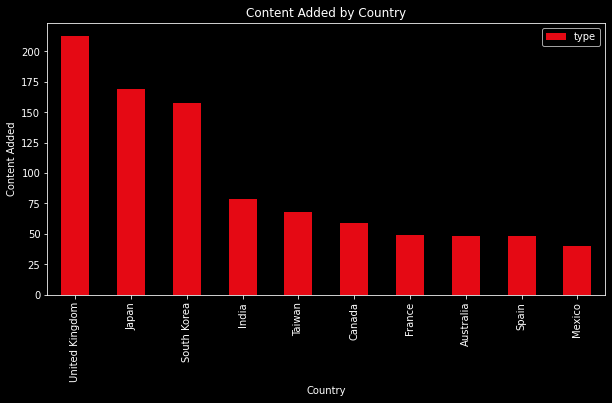

In [ ]:
#Plot country
A.plot(kind = "bar",x = "country",y = "type",figsize = (10,5),color = "#E50914")
#Label the plot
plt.xlabel('Country')
plt.ylabel('Content Added')
plt.title('Content Added by Country')
plt.show()

## What has been the type of Genre that has been added the most to Netflix over the years?

We chose to split the Genres before and after 2016 because of Netflix's expansion to 140 countries in 2016. We wanted to see if the type of content added to Netflix changed after the expansion. We also wanted to see if the type of content added to Netflix changed after the expansion to 140 countries in 2016 was due to the change in the target audience.

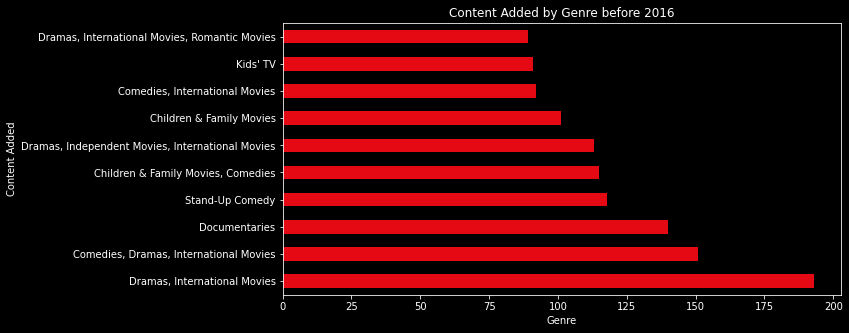

In [ ]:
#Plot Genres before 2016 and sort in descending order vertically
netflix_ds[netflix_ds['release_year'] <= '1-1-2016']['listed_in'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Genre')
plt.ylabel('Content Added')
plt.title('Content Added by Genre before 2016')
plt.show()

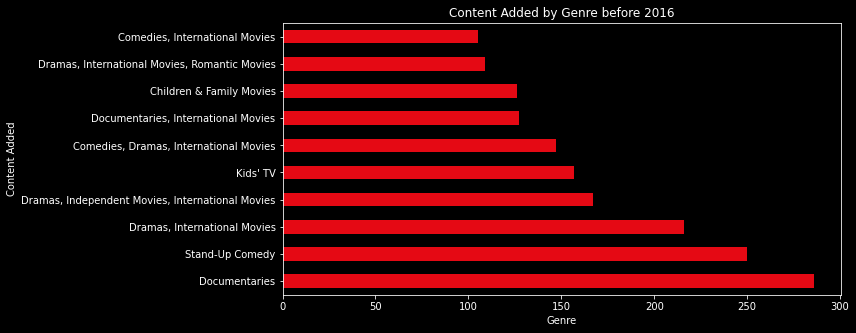

In [ ]:
#Plot Genres after 2016 and sort in descending order vertically
netflix_ds[netflix_ds['release_year'] >= '1-1-2016']['listed_in'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Genre')
plt.ylabel('Content Added')
plt.title('Content Added by Genre before 2016')
plt.show()

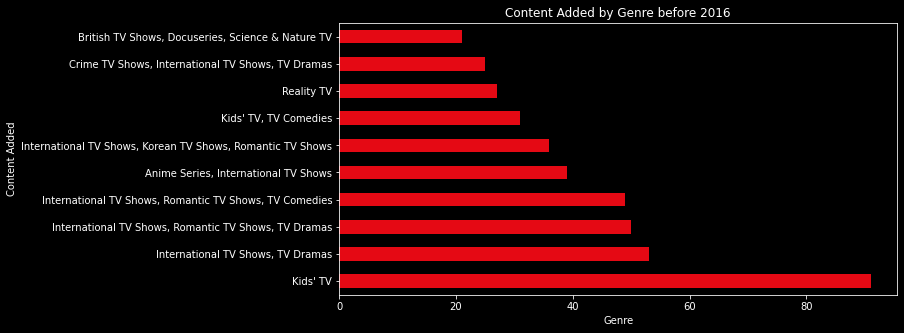

In [ ]:
#Top 10 Genres of TV Shows before 2016
netflix_ds[(netflix_ds['release_year'] <= '1-1-2016') & (netflix_ds['type'] == 'TV Show')]['listed_in'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Genre')
plt.ylabel('Content Added')
plt.title('Content Added by Genre before 2016')
plt.show()

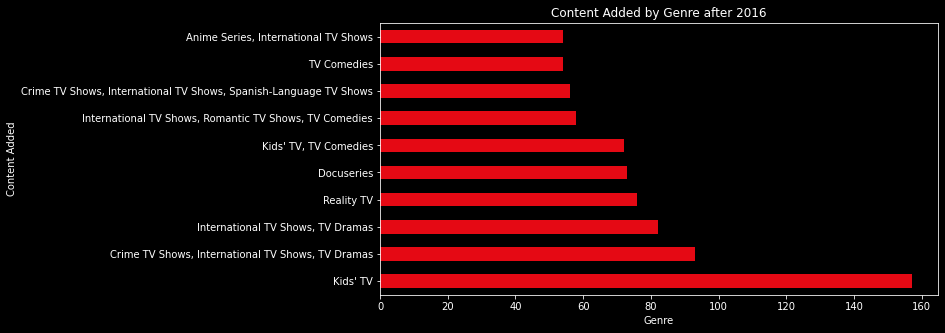

In [ ]:
#Top 10 Genres of TV Shows after 2016
netflix_ds[(netflix_ds['release_year'] >= '1-1-2016') & (netflix_ds['type'] == 'TV Show')]['listed_in'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,5), color='#E50914')
#Label the plot
plt.xlabel('Genre')
plt.ylabel('Content Added')
plt.title('Content Added by Genre after 2016')
plt.show()


## What has been the impact of K-dramas on Netflix?

## Wordcloud of Descriptions of Movies and TV Shows



In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
#Take URL of the image and create a mask for the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import urllib
import requests
url = "https://ik.imagekit.io/taw2awb5ntf/wp-content/uploads/2021/01/netflix-logo-1-2048x1152.png"
response = requests.get(url)
img = Image.open(urllib.request.urlopen(url))
mask = np.array(img)

def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val


In [ ]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

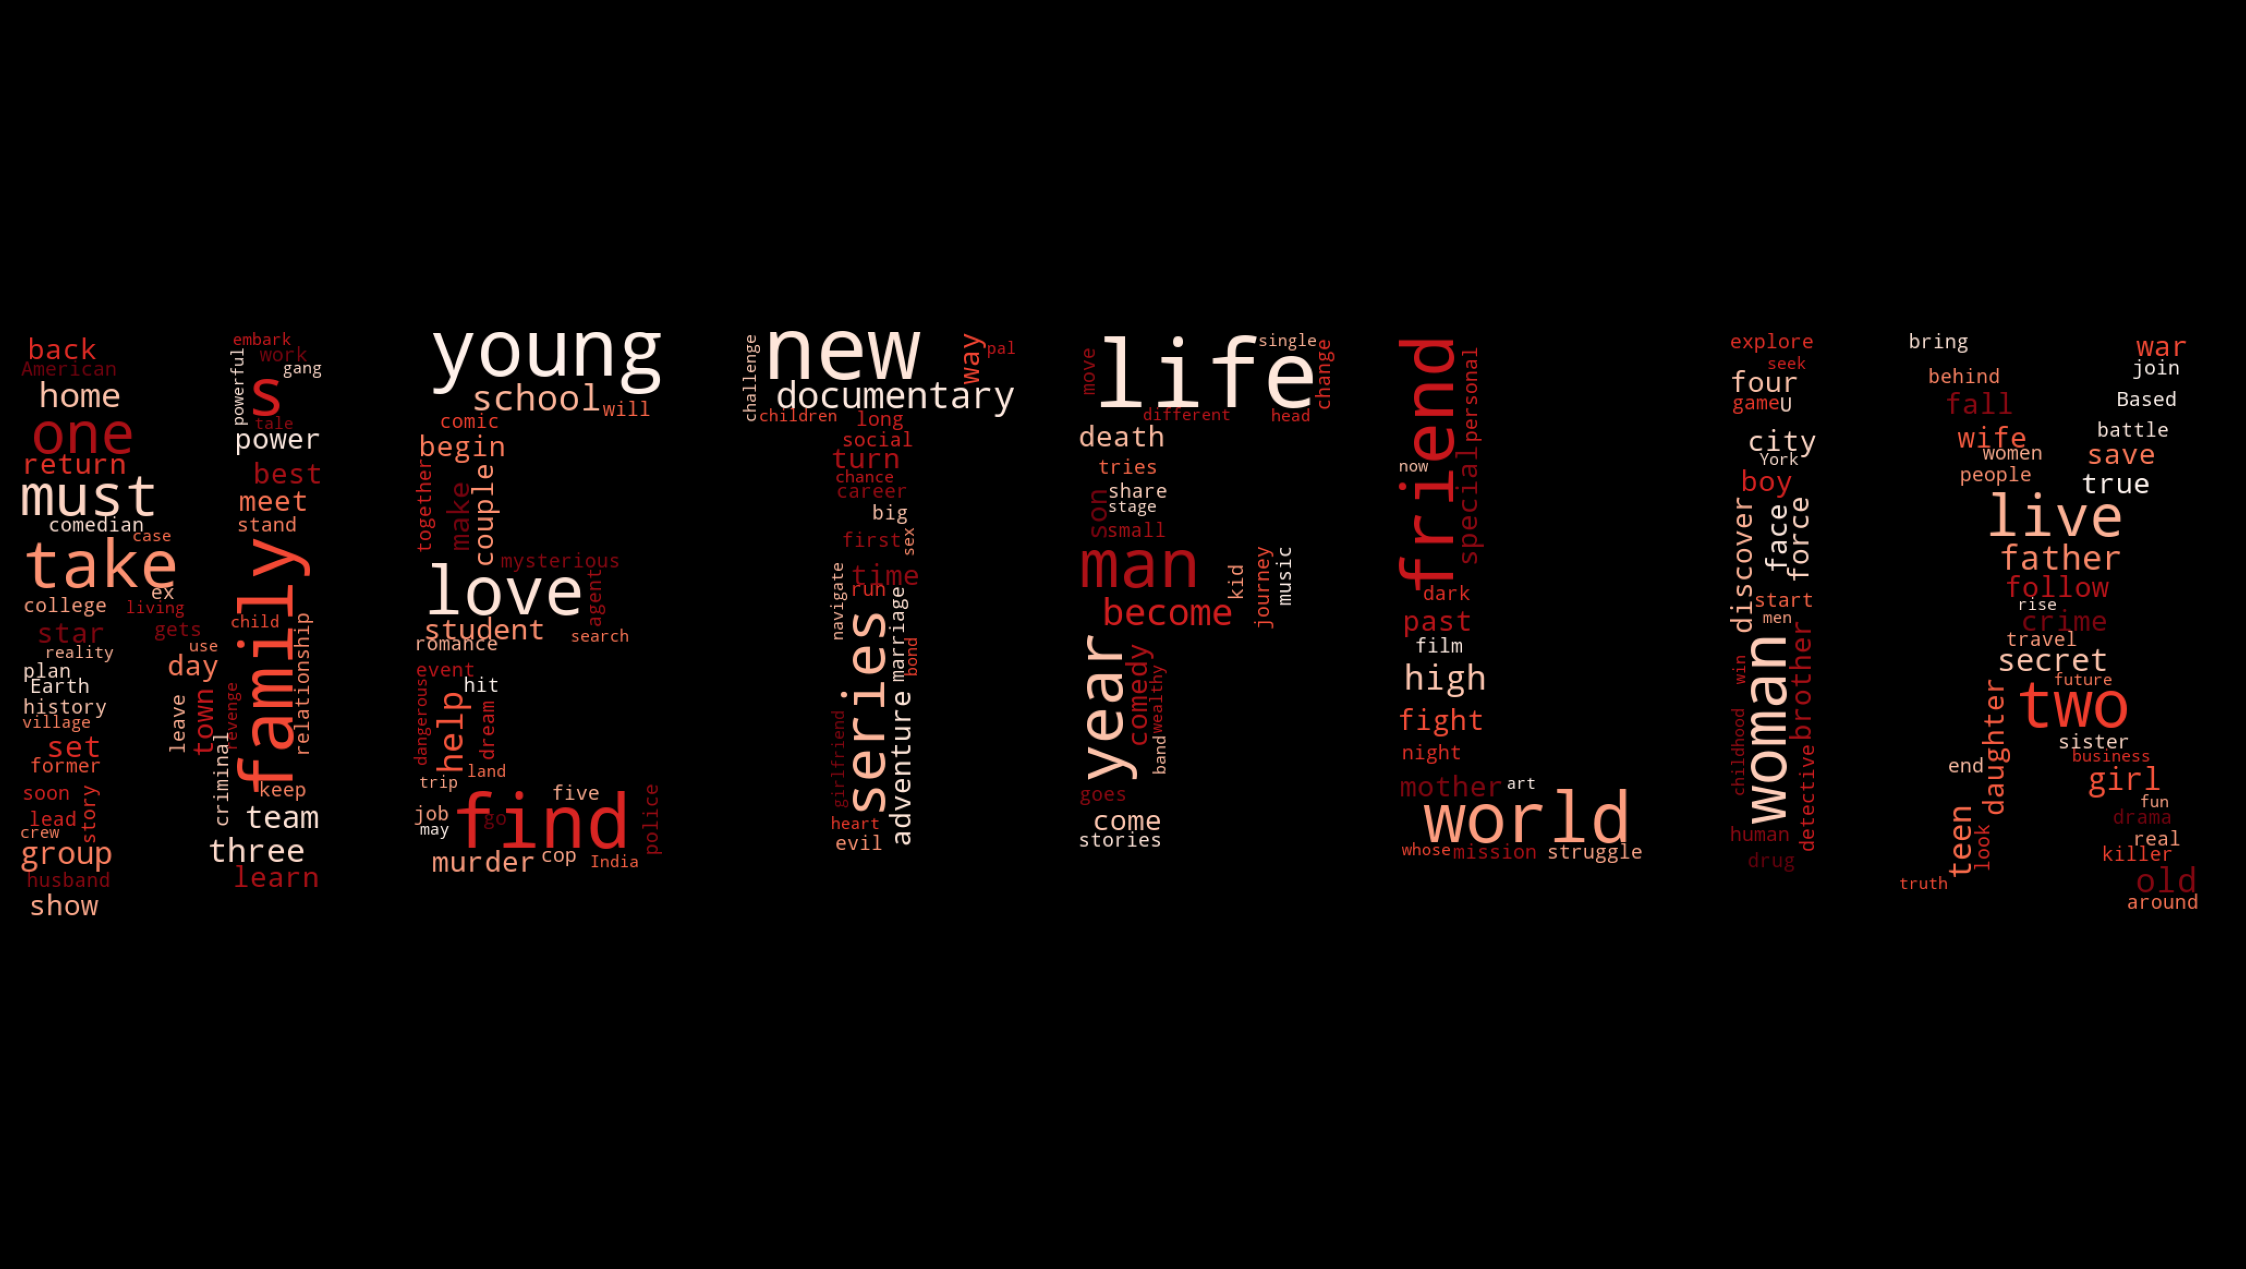

In [ ]:
description = " ".join(description for description in netflix_ds.description)

wordcloud = WordCloud(width = 3000, height = 2000, random_state=42, background_color='black', colormap='Reds', collocations=False, stopwords = STOPWORDS, mask=maskable_image).generate(description)
def plot_cloud(wordcloud):
    # Adjust the figure size
    plt.figure(figsize=(40, 30))
    # Display the word cloud
    plt.imshow(wordcloud) 
    # Remove the axis details and names
    plt.axis("off");
plot_cloud(wordcloud)
#wordcloud.to_file("netflix-wordcloud.png")

# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**

Conclusion

# **<span id="References" style="color:#023e8a;">References</span>**

References


*  https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451
* https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
* https://www.holisticseo.digital/python-seo/word-cloud/
*  https://www.dataquest.io/blog/making-538-plots/
*  https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
*  https://www.kaggle.com/general/51898
*  https://www.imdb.com/


